<a href="https://colab.research.google.com/github/Bellahmer-hacene/data-science/blob/master/regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/AndersonUyekita/ND111_data_science_foundations_02/master/04-Chapter04/15-Lesson_15/02-Dataset/house_prices.csv

--2020-04-02 14:12:33--  https://raw.githubusercontent.com/AndersonUyekita/ND111_data_science_foundations_02/master/04-Chapter04/15-Lesson_15/02-Dataset/house_prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186414 (182K) [text/plain]
Saving to: ‘house_prices.csv’

house_prices.csv    100%[===================>] 182.04K  --.-KB/s    in 0.02s   

2020-04-02 14:12:33 (8.54 MB/s) - ‘house_prices.csv’ saved [186414/186414]



In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('house_prices.csv')

In [0]:
df

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539
...,...,...,...,...,...,...,...
6023,4373,B,757,0,0,lodge,385420
6024,4422,C,3540,5,3,victorian,890627
6025,5894,B,1518,2,1,lodge,760829
6026,5591,C,2270,4,2,ranch,575515


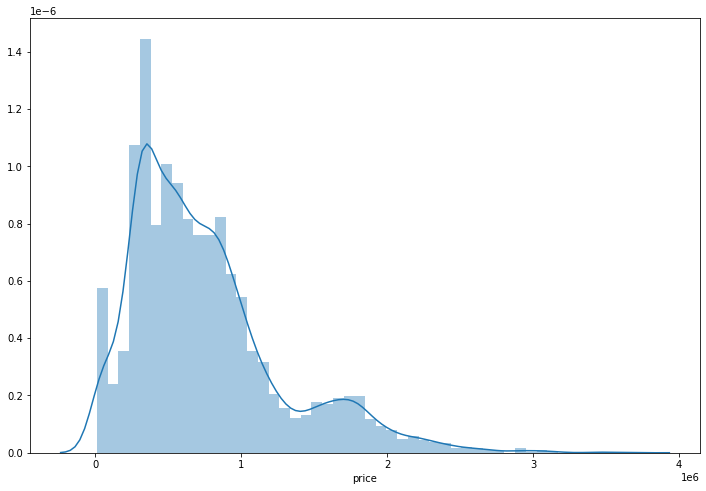

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

In [0]:
df = pd.concat([df,pd.get_dummies(df['style'],prefix="style")],axis=1)
df.drop('style', axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['neighborhood'],prefix="neighborhood")],axis=1)
df.drop('neighborhood', axis=1, inplace=True)

In [0]:
df.drop('house_id', axis=1, inplace=True)

In [0]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
df.shape

(6028, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(9, ))) # Hidden 1
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
142/142 - 1s - loss: 501398962176.0000 - val_loss: 94135214080.0000
Epoch 2/1000
142/142 - 0s - loss: 63442673664.0000 - val_loss: 46706806784.0000
Epoch 3/1000
142/142 - 0s - loss: 38135201792.0000 - val_loss: 29107593216.0000
Epoch 4/1000
142/142 - 0s - loss: 23079616512.0000 - val_loss: 16880315392.0000
Epoch 5/1000
142/142 - 0s - loss: 13814977536.0000 - val_loss: 10337317888.0000
Epoch 6/1000
142/142 - 0s - loss: 8352211456.0000 - val_loss: 6494687744.0000
Epoch 7/1000
142/142 - 0s - loss: 4925830144.0000 - val_loss: 3657572096.0000
Epoch 8/1000
142/142 - 0s - loss: 2565332224.0000 - val_loss: 1754068992.0000
Epoch 9/1000
142/142 - 0s - loss: 1124929536.0000 - val_loss: 708031552.0000
Epoch 10/1000
142/142 - 0s - loss: 422923296.0000 - val_loss: 368894880.0000
Epoch 11/1000
142/142 - 0s - loss: 215767456.0000 - val_loss: 191504576.0000
Epoch 12/1000
142/142 - 0s - loss: 105491544.0000 - val_loss: 95613784.0000
Epoch 13/1000
142/142 - 0s - loss: 57158592.0000 - val_los

<Figure size 864x576 with 0 Axes>

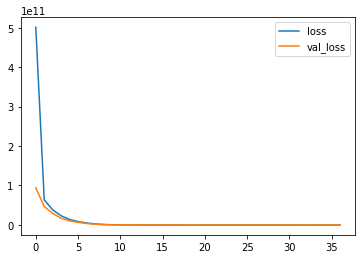

In [0]:
plt.figure(figsize=(12,8))
losses = pd.DataFrame(model.history.history)
losses.plot()

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(mean_squared_error(y_test,predictions))
MAE = mean_absolute_error(y_test,predictions)
EVS = explained_variance_score(y_test,predictions)
print("MSE : {}".format(MSE))
print("RMSE : {}".format(RMSE))
print("MAE : {}".format(MAE))
print("EVS : {}".format(EVS))

MSE : 12603883.199452654
RMSE : 3550.194811479034
MAE : 1188.1586496091159
EVS : 0.9999557919913703


In [0]:
def chart_regression(pred, y, sort=True):
    plt.figure(figsize=(12,8))
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True) 
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.plot(t['y'].tolist(), label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

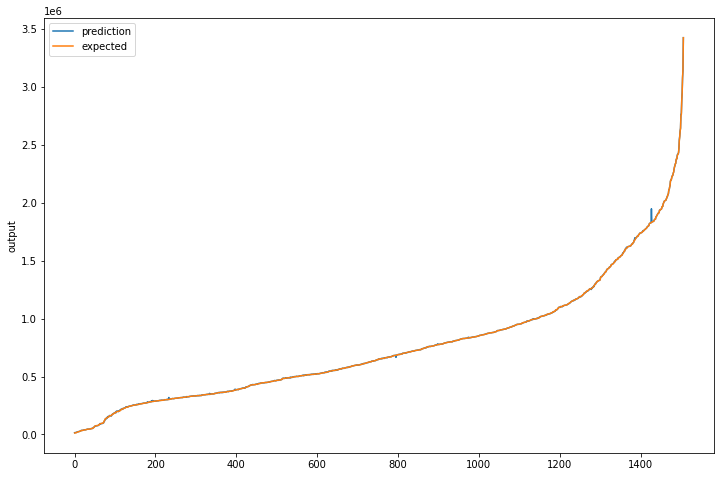

In [0]:
chart_regression(predictions.flatten(),y_test)

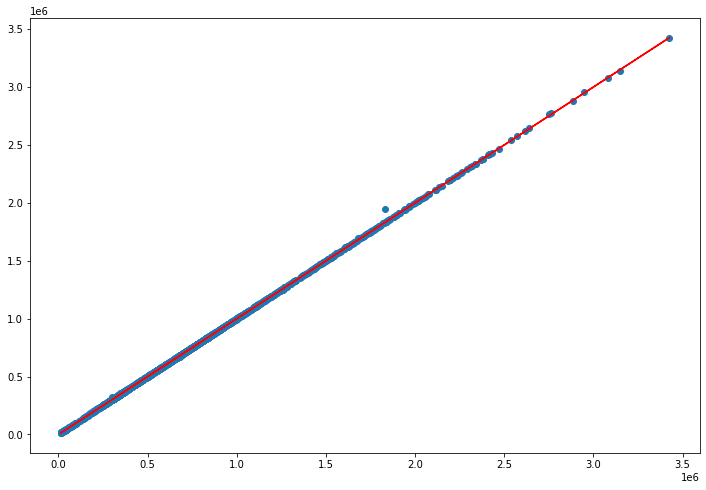

In [0]:
plt.figure(figsize=(12,8))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')